In [1]:
import torch
print(torch.__version__)
print("CUDA Available:", torch.cuda.is_available())


2.7.0+cu118
CUDA Available: True


##### Eg 1-Manual Derivative for Function y=x^2

In [2]:
def dy_dx(x):
    return 2*x

dy_dx(3)

6

##### Eg2 - Using Autograd for Derivatives

In [3]:
x = torch.tensor(3.0, requires_grad=True)
# requires_grad=True tells PyTorch: “I want to track operations on this tensor to calculate its gradient later.”

y = x**2

In [4]:
print(x)
print(y)  # PyTorch remembers this operation internally using a computation graph.

tensor(3., requires_grad=True)
tensor(9., grad_fn=<PowBackward0>)


In [5]:
y.backward()  # tells PyTorch: “Now go backward in the computation graph and compute gradients.”
x.grad  # Access the Gradients

tensor(6.)

##### Eg 3- Nested Autograd

In [6]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
z = torch.sin(y)

print(x,y,z)

tensor(3., requires_grad=True) tensor(9., grad_fn=<PowBackward0>) tensor(0.4121, grad_fn=<SinBackward0>)


In [7]:
z.backward()  # Runs Only once, for 2nd time will show error

In [8]:
print(x.grad)


tensor(-5.4668)


##### **Building a Basic Neural Network for this Eg of CGPA / Placement** 

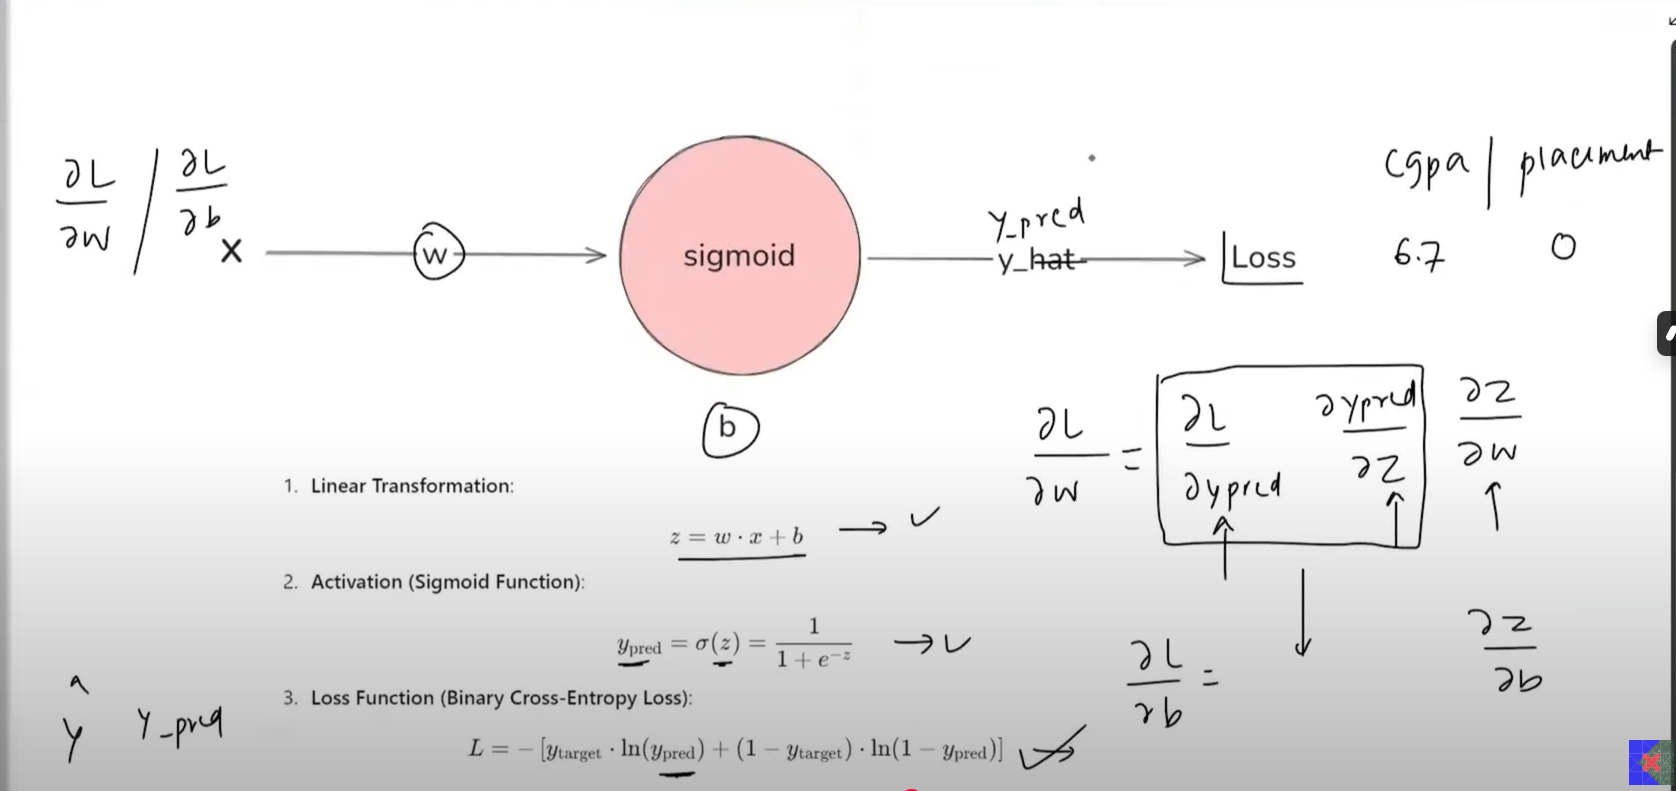

##### **Manually Creating an Derivative NN**

In [9]:
x = torch.tensor(6.7)  # Input Feature 
y = torch.tensor(0.0)  # True Label (Binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [10]:
# Function for Binary Cross-Entropy Loss for Scalar Tensor
def binary_loss(prediction, target):
    epsilon = 1e-8  # To prevent Log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    
    return -(target*torch.log(prediction) + (1-target)*torch.log(1-prediction))

In [11]:
# Forward Pass
z = w*x + b  # Weighted Sum (Linear Part)
y_pred = torch.sigmoid(z)  # Predicted Probability

# Computing Binary Cross Entropy Loss
loss = binary_loss(y_pred, y)

In [12]:
loss

tensor(6.7012)

In [43]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [44]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


##### **Same Function using Autograd**

In [13]:
x = torch.tensor(6.7)  # Input Feature 
y = torch.tensor(0.0)  # True Label (Binary)

w = torch.tensor(1.0, requires_grad=True)  # Weight
b = torch.tensor(0.0, requires_grad=True)  # Bias

In [14]:
print(w,b)

tensor(1., requires_grad=True) tensor(0., requires_grad=True)


In [15]:
z = w*x + b
print(z)

tensor(6.7000, grad_fn=<AddBackward0>)


In [16]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [17]:
loss = binary_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

Computational Map of the NN
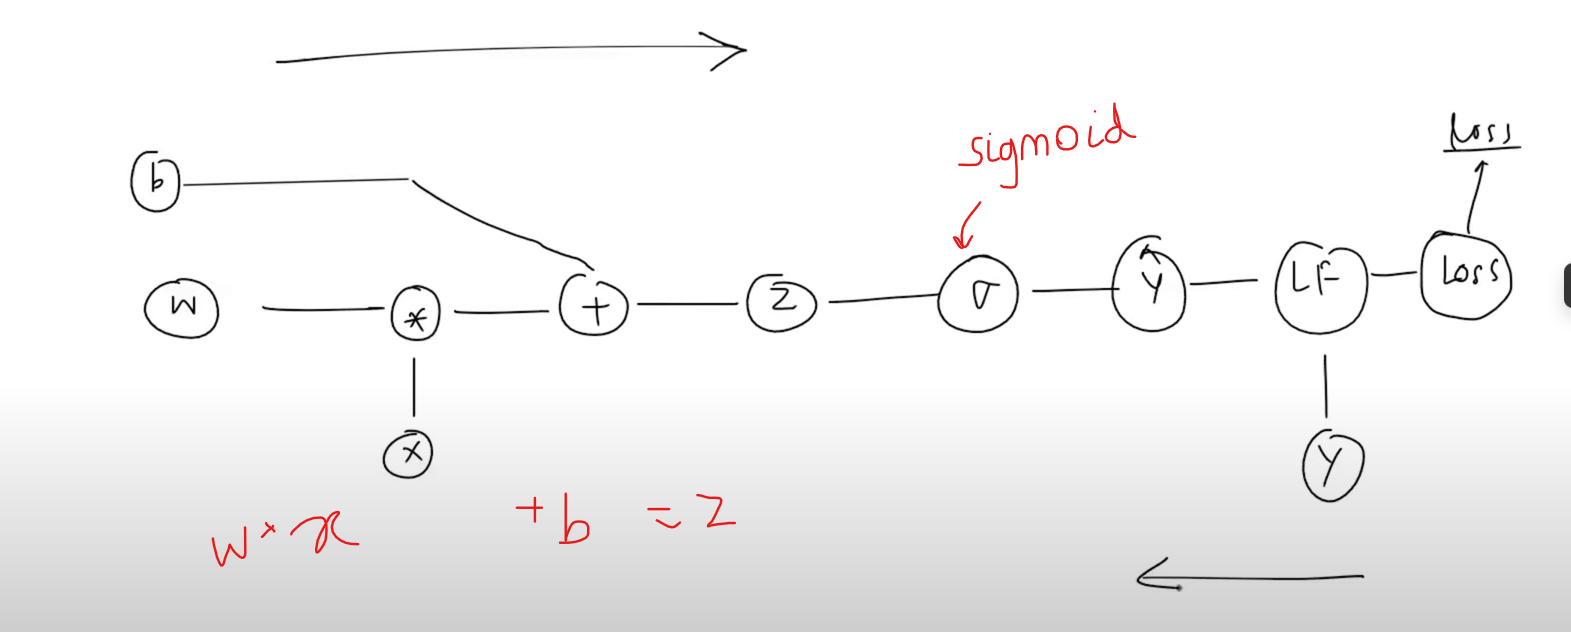
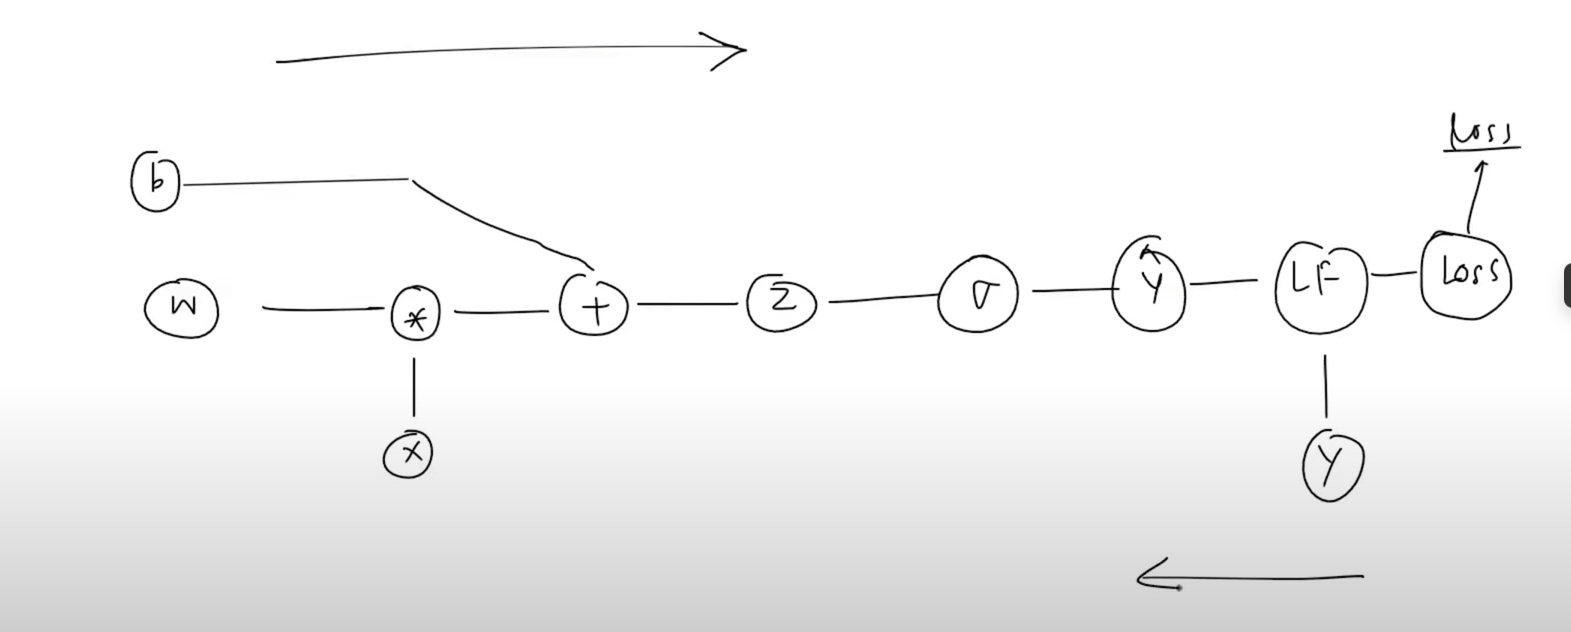

In [18]:
# Backward Propagation
loss.backward()

In [19]:
print(w.grad)  # dLoss/dw
print(b.grad)  # dLoss/db

tensor(6.6918)
tensor(0.9988)


##### Autograd with Vectors

In [20]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = (x**2).mean()

In [22]:
print(x, y)

tensor([1., 2., 3.], requires_grad=True) tensor(4.6667, grad_fn=<MeanBackward0>)


In [23]:
y.backward()

In [24]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

Internal Working - 

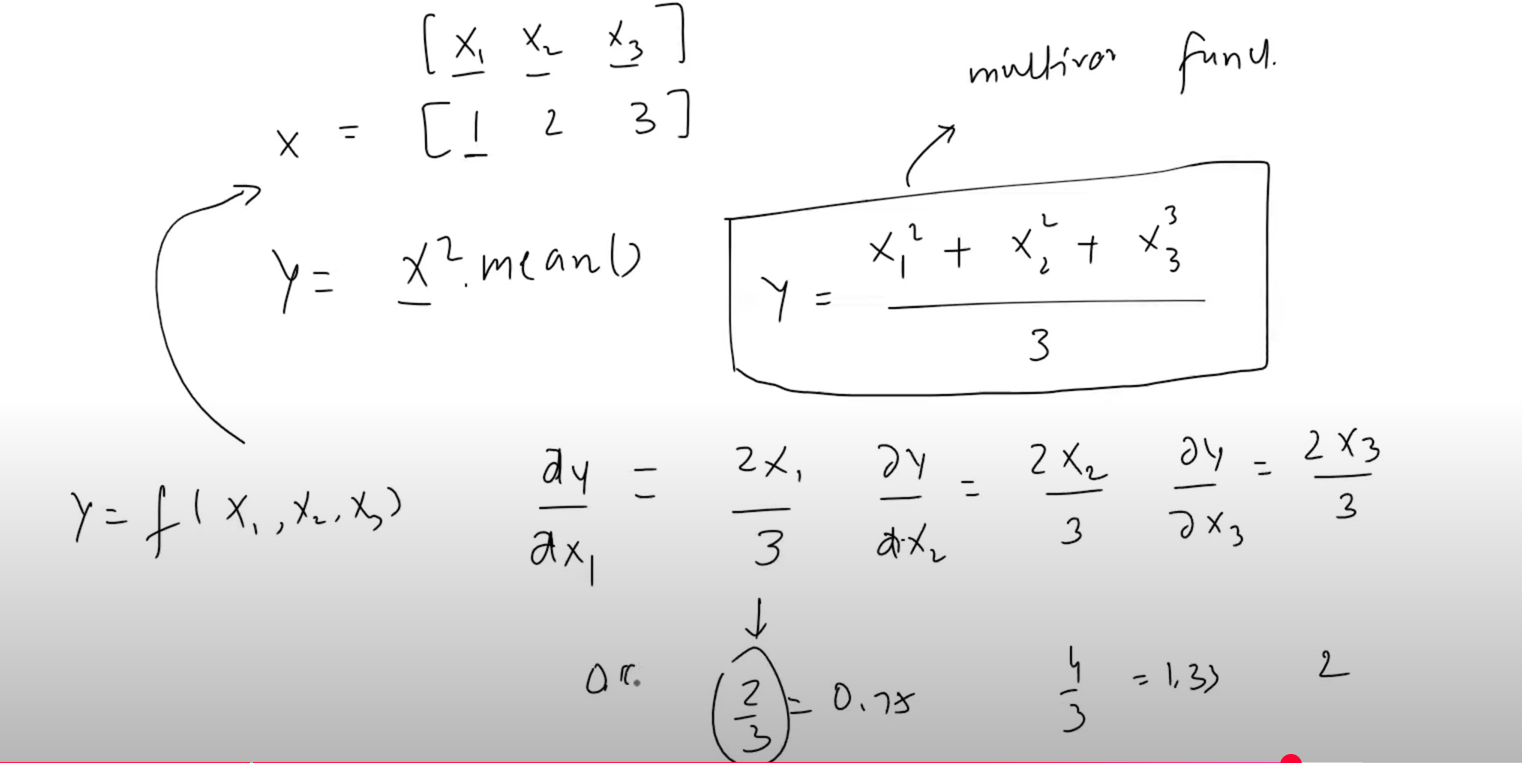

Clearing Gradients

In [25]:
x.grad.zero_() # Resets the Tensors Inplace

tensor([0., 0., 0.])

##### **Disable Gradient Tracking**

option 1 - requires_grad_(False)  
option 2 - detach()  
option 3 - torch.no_grad()